In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
random.seed(42)
# Parameters
job_titles = [
    "RegisteredNurse_ICU", "RegisteredNurse_MedSurg", "RegisteredNurse_Telemetry",
    "RegisteredNurse_Oncology", "RegisteredNurse_Pediatric", "PhysioTherapist",
    "LabTechnician", "RegisteredNurse_CriticalCare", "RegisteredNurse_Cardiology",
    "RegisteredNurse_Surgery"
]

cities = [
    ("Dallas", "TX"), ("Atlanta", "GA"), ("New York", "NY"), ("Philadelphia", "PA"),
    ("Washington", "DC"), ("San Francisco", "CA"), ("Los Angeles", "CA"), ("Seattle", "WA"),
    ("Chicago", "IL"), ("San Diego", "CA"), ("Miami", "FL"), ("Boston", "MA"),
    ("Detroit", "MI"), ("Phoenix", "AZ"), ("Houston", "TX")
]

hospital_suffixes = ["Corporate", "NonProfit", "Community", "Veterans", "Govt"]

base_rates = {
    "RegisteredNurse_ICU": (40, 60),
    "RegisteredNurse_MedSurg": (35, 55),
    "RegisteredNurse_Telemetry": (38, 58),
    "RegisteredNurse_Oncology": (42, 62),
    "RegisteredNurse_Pediatric": (40, 60),
    "PhysioTherapist": (35, 55),
    "LabTechnician": (30, 50),
    "RegisteredNurse_CriticalCare": (45, 65),
    "RegisteredNurse_Cardiology": (43, 63),
    "RegisteredNurse_Surgery": (45, 65)
}

location_adjustments = {
    "High": 1.20,
    "Medium": 1.10,
    "Standard": 1.00
}

high_cost_cities = ["San Francisco", "New York", "Los Angeles", "Washington"]
medium_cost_cities = ["Chicago", "Seattle", "Boston", "Miami"]

# Function to generate hospital name
def generate_hospital_name(city):
    suffix = random.choice(hospital_suffixes)
    return f"{city} {suffix} Hospital"

# Function to generate contract dates
def generate_contract_dates(year):
    start_date = datetime(year, random.randint(1, 12), random.randint(1, 28))
    duration = random.randint(1, 13) * 7  # Up to 13 weeks
    end_date = start_date + timedelta(days=duration)
    return start_date, end_date

# Function to calculate hourly rate
def calculate_hourly_rate(base_rate, city, start_date):
    # Location adjustment
    if city in high_cost_cities:
        location_multiplier = location_adjustments["High"]
    elif city in medium_cost_cities:
        location_multiplier = location_adjustments["Medium"]
    else:
        location_multiplier = location_adjustments["Standard"]

    # Seasonal adjustment
    month = start_date.month
    if 10 <= month <= 12 or 1 <= month <= 3:  # Flu season
        seasonal_multiplier = 1.10
        if month == 12:  # Additional for Christmas
            seasonal_multiplier += 0.05
    else:
        seasonal_multiplier = 1.00

    return round(base_rate * location_multiplier * seasonal_multiplier, 2)

# Data generation
data = []
for _ in range(250000):
    job_title = random.choice(job_titles)
    city, state = random.choice(cities)
    hospital_name = generate_hospital_name(city)
    year = random.choice([2023, 2024])
    start_date, end_date = generate_contract_dates(year)
    base_rate = random.uniform(*base_rates[job_title])
    hourly_rate = calculate_hourly_rate(base_rate, city, start_date)

    data.append([
        job_title, state, f"{state}, {city}", hospital_name,
        start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"),
        hourly_rate
        ])

columns = ["Job Title", "State", "Location (State & City)", "Hospital Name", "Contract Start Date", "Contract End Date", "Hourly Pay Rate"]  # Define column names
df = pd.DataFrame(data, columns=columns)  # Create DataFrame from 'data' with column names
print(df.head())  # Display the first few rows of the DataFrame
print(df.info())  # Get information about the DataFrame's columns and data types
print(df.describe()) # Generate descriptive statistics

                    Job Title State Location (State & City)  \
0     RegisteredNurse_MedSurg    TX              TX, Dallas   
1  RegisteredNurse_Cardiology    GA             GA, Atlanta   
2  RegisteredNurse_Cardiology    CA           CA, San Diego   
3    RegisteredNurse_Oncology    WA             WA, Seattle   
4               LabTechnician    CA       CA, San Francisco   

                      Hospital Name Contract Start Date Contract End Date  \
0         Dallas Community Hospital          2023-04-05        2023-06-28   
1             Atlanta Govt Hospital          2024-01-01        2024-01-15   
2      San Diego Corporate Hospital          2023-12-21        2024-03-14   
3             Seattle Govt Hospital          2024-01-25        2024-04-25   
4  San Francisco Community Hospital          2023-04-25        2023-06-06   

   Hourly Pay Rate  
0            37.05  
1            52.11  
2            61.98  
3            54.68  
4            38.45  
<class 'pandas.core.frame.DataFr

Show variations of the hourly pay rates across the major metros

                              mean  median    min    max        std
Location (State & City)                                            
AZ, Phoenix              52.049281  52.000  30.01  74.72   8.204199
CA, Los Angeles          62.395199  62.340  36.01  89.63  10.016590
CA, San Diego            52.076523  52.070  30.01  74.73   8.246569
CA, San Francisco        62.336811  62.310  36.01  89.40   9.987662
DC, Washington           62.442562  62.410  36.01  89.69   9.975447
FL, Miami                57.263657  57.195  33.03  82.22   9.046644
GA, Atlanta              51.947192  51.970  30.06  74.72   8.262436
IL, Chicago              57.117379  57.030  33.05  82.22   9.076158
MA, Boston               57.110481  57.130  33.02  82.16   9.033292
MI, Detroit              51.815801  51.720  30.02  74.73   8.325331
NY, New York             62.450675  62.400  36.02  89.66   9.976882
PA, Philadelphia         52.001275  51.940  30.01  74.70   8.352110
TX, Dallas               51.933647  51.865  30.0

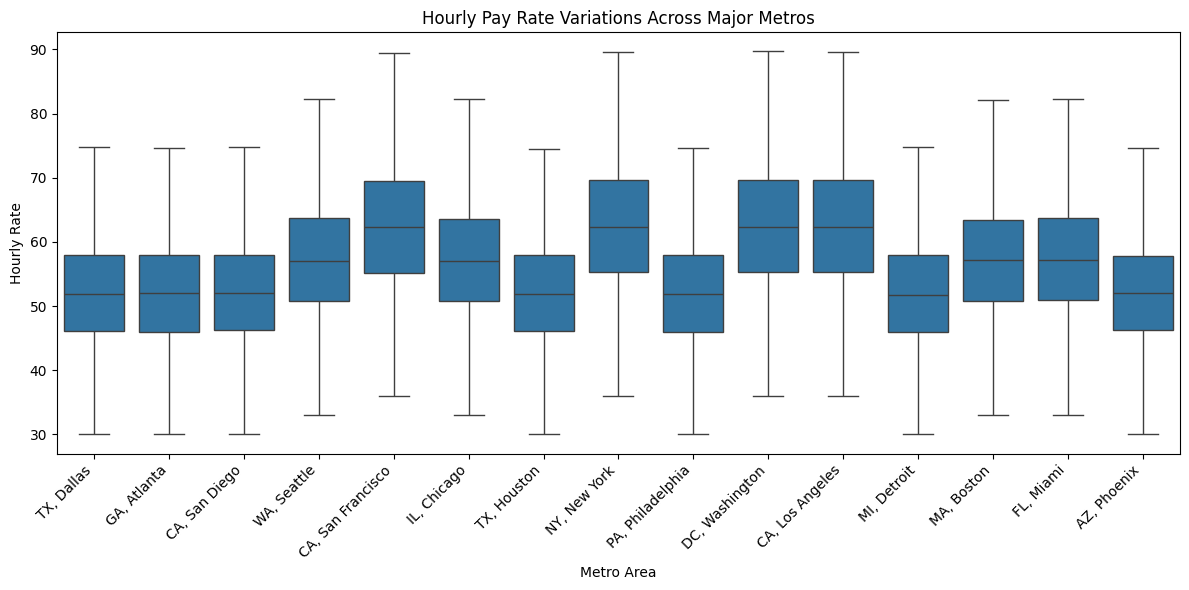

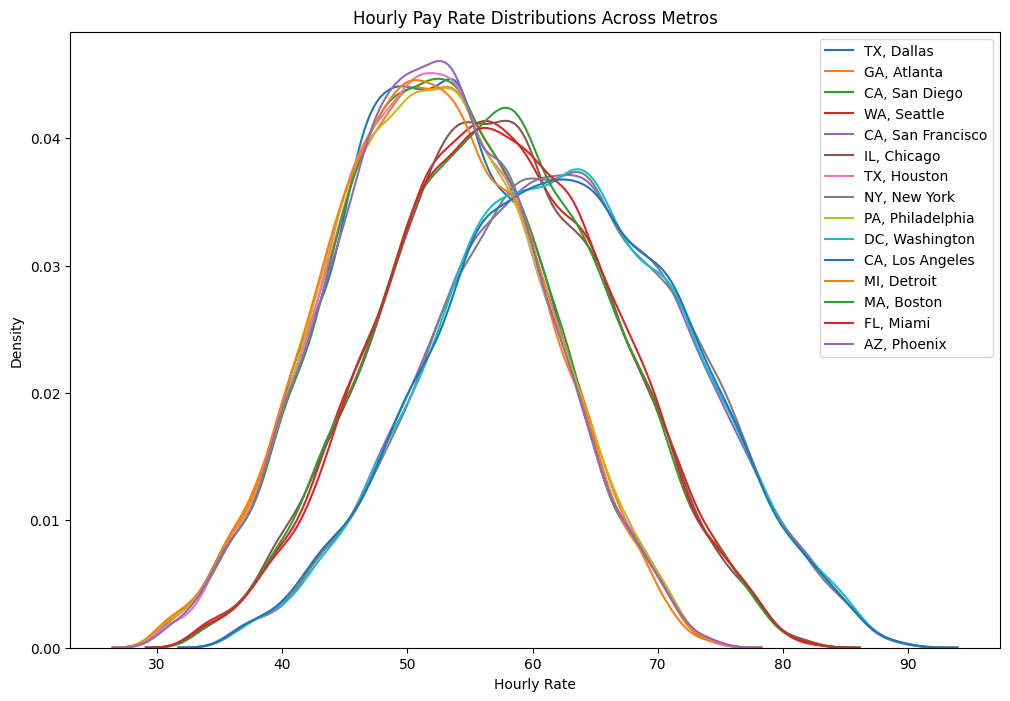

In [ ]:
# show variations of the hourly pay rates across the major metros

import matplotlib.pyplot as plt
import seaborn as sns

# Group data by metro area and calculate descriptive statistics for hourly pay rates
metro_pay_stats = df.groupby('Location (State & City)')['Hourly Pay Rate'].agg(['mean', 'median', 'min', 'max', 'std'])

print(metro_pay_stats)

# Visualization: Box plots for hourly rates across metros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location (State & City)', y='Hourly Pay Rate', data=df)
plt.title('Hourly Pay Rate Variations Across Major Metros')
plt.xlabel('Metro Area')
plt.ylabel('Hourly Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Visualization: Distribution of hourly rates for each metro
plt.figure(figsize=(12, 8))
for Location in df['Location (State & City)'].unique():
    sns.kdeplot(df[df['Location (State & City)'] == Location]['Hourly Pay Rate'], label=Location)

plt.title('Hourly Pay Rate Distributions Across Metros')
plt.xlabel('Hourly Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

Showing the uptick in pay rates during flu & holiday season

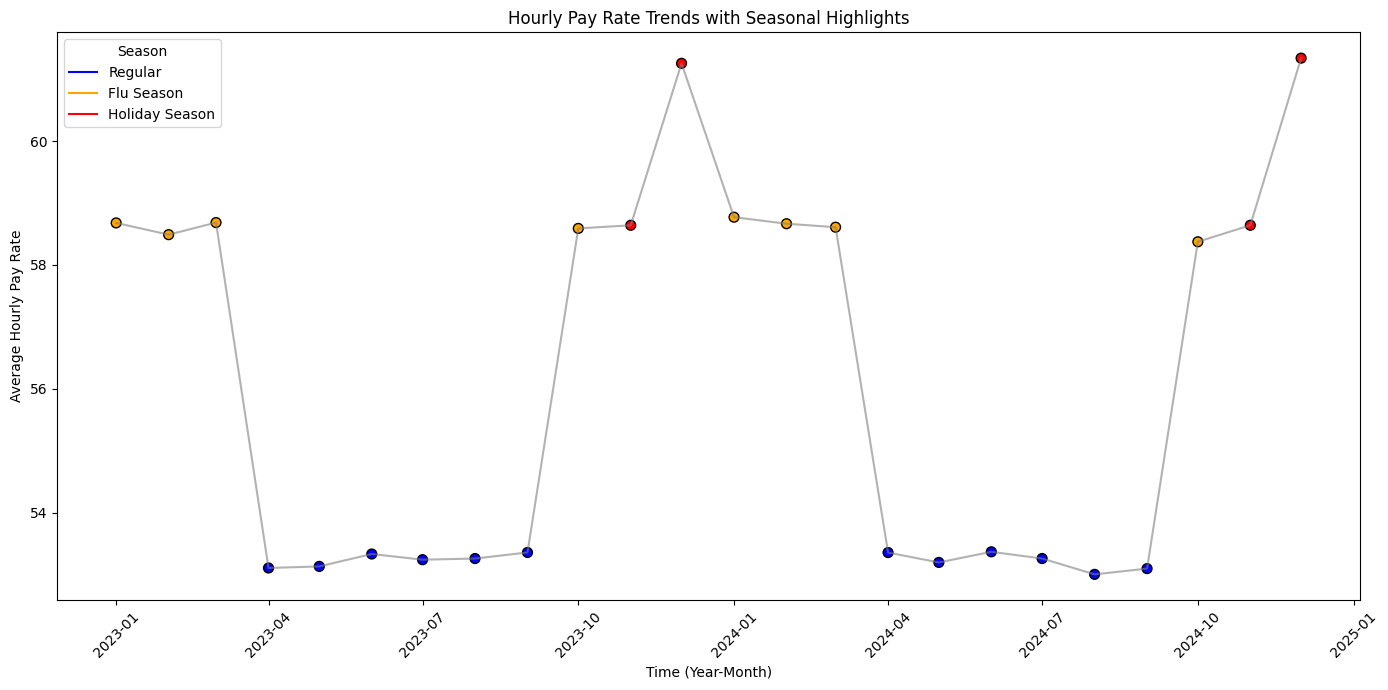

In [ ]:
df['Contract Start Date'] = pd.to_datetime(df['Contract Start Date'])

# Extract month and year for analysis
df['Month'] = df['Contract Start Date'].dt.month
df['Year'] = df['Contract Start Date'].dt.year

# Group by year and month, calculate mean hourly pay rate
monthly_pay = df.groupby(['Year', 'Month'])['Hourly Pay Rate'].mean().reset_index()

# Create a unified time index for continuous plotting
monthly_pay['YearMonth'] = pd.to_datetime(
    monthly_pay['Year'].astype(str) + '-' + monthly_pay['Month'].astype(str)
)

# Identify flu season (October to March) and holiday season (November to December)
monthly_pay['Season'] = 'Regular'
monthly_pay.loc[((monthly_pay['Month'] >= 10) | (monthly_pay['Month'] <= 3)), 'Season'] = 'Flu Season'
monthly_pay.loc[(monthly_pay['Month'] == 11) | (monthly_pay['Month'] == 12), 'Season'] = 'Holiday Season'

# Map seasons to colors
color_map = {
    'Regular': 'blue',
    'Flu Season': 'orange',
    'Holiday Season': 'red'
}
colors = monthly_pay['Season'].map(color_map)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(monthly_pay['YearMonth'], monthly_pay['Hourly Pay Rate'], color='gray', alpha=0.6, label='Hourly Pay Rate')
plt.scatter(monthly_pay['YearMonth'], monthly_pay['Hourly Pay Rate'], c=colors, edgecolor='k', s=50, label='Seasonal Highlight')
plt.title('Hourly Pay Rate Trends with Seasonal Highlights')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Hourly Pay Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(handles=[plt.Line2D([0], [0], color='blue', label='Regular'),
                    plt.Line2D([0], [0], color='orange', label='Flu Season'),
                    plt.Line2D([0], [0], color='red', label='Holiday Season')],
           title='Season')
plt.show()

In [ ]:

# Define the cities and their desirability metrics
data = {
    "City": ["Dallas", "Atlanta", "New York", "Philadelphia", "Washington", "San Francisco",
             "Los Angeles", "Seattle", "Chicago", "San Diego", "Miami", "Boston",
             "Detroit", "Phoenix", "Houston"],
    "State": ["TX", "GA", "NY", "PA", "DC", "CA", "CA", "WA", "IL", "CA", "FL", "MA",
              "MI", "AZ", "TX"],
    "Cost of Living": ["Medium", "Medium", "High", "Medium", "High", "Very High",
                       "High", "High", "Medium", "High", "Medium", "High",
                       "Low", "Medium", "Medium"],
    "School Quality": ["Moderate", "Moderate", "High", "Moderate", "High", "High",
                       "Moderate", "High", "Moderate", "Moderate", "Low", "High",
                       "Low", "Moderate", "Moderate"],
    "Crime Rate": ["Moderate", "High", "Moderate", "High", "Moderate", "Low",
                   "Moderate", "Low", "High", "Low", "High", "Low",
                   "Very High", "Moderate", "Moderate"],
    "Public Transport": ["Low", "Moderate", "High", "Moderate", "High", "High",
                         "Moderate", "Moderate", "High", "Moderate", "Low", "High",
                         "Low", "Low", "Low"]
}

# Create the DataFrame
city_df = pd.DataFrame(data)

# Define the scoring system for each metric
score_mapping = {
    "Cost of Living": {"Low": 3, "Medium": 2, "High": 1, "Very High": 0},
    "School Quality": {"Low": 1, "Moderate": 2, "High": 3},
    "Crime Rate": {"Very High": 0, "High": 1, "Moderate": 2, "Low": 3},
    "Public Transport": {"Low": 1, "Moderate": 2, "High": 3}
}

# Apply the score mapping to each column
city_df['Cost of Living Score'] = city_df['Cost of Living'].map(score_mapping['Cost of Living'])
city_df['School Quality Score'] = city_df['School Quality'].map(score_mapping['School Quality'])
city_df['Crime Rate Score'] = city_df['Crime Rate'].map(score_mapping['Crime Rate'])
city_df['Public Transport Score'] = city_df['Public Transport'].map(score_mapping['Public Transport'])

# Calculate the total desirability score
city_df['Desirability Score'] = (city_df['Cost of Living Score'] +
                                 city_df['School Quality Score'] +
                                 city_df['Crime Rate Score'] +
                                 city_df['Public Transport Score'])

# Drop the individual score columns to leave only the important ones
city_df = city_df.drop(columns=['Cost of Living Score', 'School Quality Score', 'Crime Rate Score', 'Public Transport Score'])

# Show the final dataframe
print(city_df)




             City State Cost of Living School Quality Crime Rate  \
0          Dallas    TX         Medium       Moderate   Moderate   
1         Atlanta    GA         Medium       Moderate       High   
2        New York    NY           High           High   Moderate   
3    Philadelphia    PA         Medium       Moderate       High   
4      Washington    DC           High           High   Moderate   
5   San Francisco    CA      Very High           High        Low   
6     Los Angeles    CA           High       Moderate   Moderate   
7         Seattle    WA           High           High        Low   
8         Chicago    IL         Medium       Moderate       High   
9       San Diego    CA           High       Moderate        Low   
10          Miami    FL         Medium            Low       High   
11         Boston    MA           High           High        Low   
12        Detroit    MI            Low            Low  Very High   
13        Phoenix    AZ         Medium       Mod

 Showing hourly pay rates against the desirability of a city

Correlation between Hourly Pay Rate and Desirability Score: 0.21913897431973928


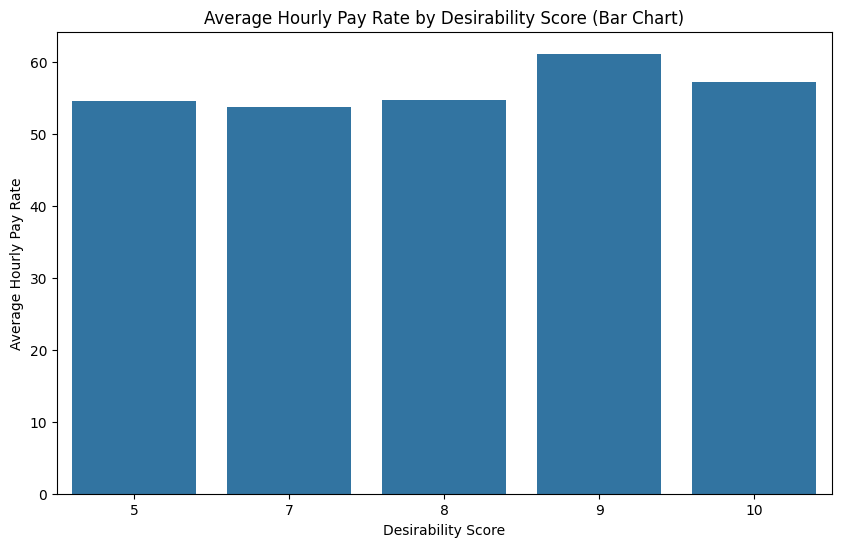

In [ ]:
# Rename 'City' column in city_df to match the city part in 'Location (State & City)' column in df
city_df.rename(columns={'City': 'City'}, inplace=True)

# Extract City from 'Location (State & City)' in df
df['City'] = df['Location (State & City)'].str.split(', ').str[1]

# Merge the two DataFrames based on the 'City' column
merged_df = pd.merge(df, city_df[['City', 'Desirability Score']], on='City', how='left')
correlation = merged_df['Hourly Pay Rate'].corr(merged_df['Desirability Score'])
print(f"Correlation between Hourly Pay Rate and Desirability Score: {correlation}")
avg_hourly_rate = df.groupby('Location (State & City)')['Hourly Pay Rate'].mean().reset_index()

# Bar chart: Average Hourly Pay Rate by Desirability Score
avg_pay_by_desirability = merged_df.groupby('Desirability Score')['Hourly Pay Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Desirability Score', y='Hourly Pay Rate', data=avg_pay_by_desirability)
plt.title('Average Hourly Pay Rate by Desirability Score (Bar Chart)')
plt.xlabel('Desirability Score')
plt.ylabel('Average Hourly Pay Rate')
plt.xticks(rotation=0)
plt.show()

 Showing specialization getting higher pay vs other job titles

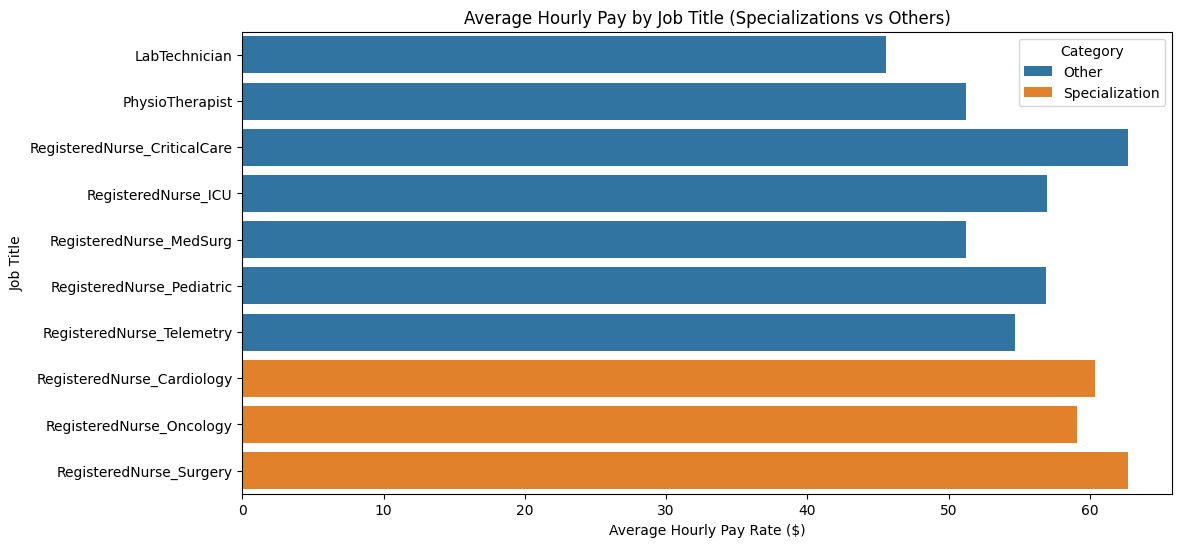

In [ ]:
# Define the specializations
specializations = ["RegisteredNurse_Oncology", "RegisteredNurse_Cardiology", "RegisteredNurse_Surgery"]

# Creating a new column 'Is Specialization' to differentiate specializations from other titles
df['Is Specialization'] = df['Job Title'].apply(lambda x: 'Specialization' if x in specializations else 'Other')

# Group by 'Job Title' and calculate the average hourly pay rate for each job title
avg_pay_by_job = df.groupby(['Is Specialization', 'Job Title'])['Hourly Pay Rate'].mean().reset_index()

# Creating a bar plot to compare pay rates for specializations vs other titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Hourly Pay Rate', y='Job Title', data=avg_pay_by_job, hue='Is Specialization', dodge=False)

# Add titles and labels
plt.title('Average Hourly Pay by Job Title (Specializations vs Others)')
plt.xlabel('Average Hourly Pay Rate ($)')
plt.ylabel('Job Title')
plt.legend(title='Category', loc='upper right')

plt.show()


Random Forest Model:

Note: I have used Streamlit to display the output. For that I have saved this model along with the dataframe

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pickle


le = LabelEncoder()

# Convert 'Job Title', 'City', and 'Hospital Name' to numeric values using Label Encoding
df['Job Title'] = le.fit_transform(df['Job Title'])
df['City'] = le.fit_transform(df['City'])
df['Hospital Name'] = le.fit_transform(df['Hospital Name'])
df['Contract Start Date'] = le.fit_transform(df['Contract Start Date'])
# Select features: 'Job Title', 'City', and 'Hospital Name'
X = df[['Job Title', 'City', 'Hospital Name','Contract Start Date']]  # Features
y = df['Hourly Pay Rate']  # Target variable (Hourly Pay Rate)

# Split data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

df.to_csv('dataset.csv')
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

# Output the evaluation results
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse}")

Random Forest Mean Absolute Error (MAE): 6.340197691787711
Random Forest Root Mean Squared Error (RMSE): 7.627699553667523


MLP Model:

In [ ]:
from sklearn.neural_network import MLPRegressor
df[['State', 'City']] = df['Location (State & City)'].str.split(', ', expand=True)

df.fillna(df.mode().iloc[0], inplace=True)  # Filling missing values with the mode of each column

# Preprocessing: Convert categorical features to numeric values using Label Encoding
le = LabelEncoder()

# List of categorical features to encode (only the selected ones)
categorical_features = ['Job Title', 'City', 'Hospital Name', 'State']

# Apply Label Encoding to categorical features
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Convert 'Contract Start Date' to datetime format
df['Contract Start Date'] = pd.to_datetime(df['Contract Start Date'])

# Convert 'Contract Start Date' to the number of days since the earliest contract start date
earliest_date = df['Contract Start Date'].min()
df['Days Since Start'] = (df['Contract Start Date'] - earliest_date).dt.days

# Select features and Hourly Pay Rate as the target variable
X = df[['Job Title', 'City', 'Hospital Name', 'State', 'Days Since Start']]  # Features
y = df['Hourly Pay Rate']  # Target variable (Hourly Pay Rate)

# Split data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Multi-Layer Perceptron (MLP) regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Calculate evaluation metrics for the model
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

# Output the evaluation results
print(f"MLP Mean Absolute Error (MAE): {mlp_mae}")
print(f"MLP Root Mean Squared Error (RMSE): {mlp_rmse}")

MLP Mean Absolute Error (MAE): 6.1956380683419505
MLP Root Mean Squared Error (RMSE): 7.396570738786858


Timeseries based forecast using prophet

In [ ]:
from prophet import Prophet
import logging

# Suppress unnecessary logs
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.basicConfig(level=logging.WARNING)

# Convert 'Contract Start Date' to datetime
df['Contract Start Date'] = pd.to_datetime(df['Contract Start Date'])

# Calculate average hourly pay rate by date
time_series = df.groupby('Contract Start Date')['Hourly Pay Rate'].mean().reset_index()

# Rename columns to match Prophet requirements
time_series.rename(columns={'Contract Start Date': 'ds', 'Hourly Pay Rate': 'y'}, inplace=True)

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(time_series)
# Create a dataframe for future dates (e.g., 90 days into the future)
future_dates = model.make_future_dataframe(periods=90)

# Generate predictions
forecast = model.predict(future_dates)

# Display the forecasted values
# Select relevant columns from the forecast
forecast_summary = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)  # Show last 10 rows of predictions

# Rename columns for better understanding
forecast_summary.rename(
    columns={
        'ds': 'Date',
        'yhat': 'Predicted Hourly Rate',
        'yhat_lower': 'Lower Bound',
        'yhat_upper': 'Upper Bound',
    },
    inplace=True,
)

# Round values for easier interpretation
forecast_summary['Predicted Hourly Rate'] = forecast_summary['Predicted Hourly Rate'].round(2)
forecast_summary['Lower Bound'] = forecast_summary['Lower Bound'].round(2)
forecast_summary['Upper Bound'] = forecast_summary['Upper Bound'].round(2)

# Display the forecast
print(forecast_summary)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpryq8z9db/cj0aijom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpryq8z9db/p556g_2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56934', 'data', 'file=/tmp/tmpryq8z9db/cj0aijom.json', 'init=/tmp/tmpryq8z9db/p556g_2l.json', 'output', 'file=/tmp/tmpryq8z9db/prophet_model9h82g3fv/prophet_model-20241204171250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                             Date  Predicted Hourly Rate   Lower Bound  \
752 1970-03-23 00:00:00.000000671           4.885825e+14 -1.066711e+15   
753 1970-03-24 00:00:00.000000671           4.946144e+14 -1.094220e+15   
754 1970-03-25 00:00:00.000000671           5.006463e+14 -1.101634e+15   
755 1970-03-26 00:00:00.000000671           5.066782e+14 -1.107868e+15   
756 1970-03-27 00:00:00.000000671           5.127101e+14 -1.142464e+15   
757 1970-03-28 00:00:00.000000671           5.187420e+14 -1.167742e+15   
758 1970-03-29 00:00:00.000000671           5.247738e+14 -1.194313e+15   
759 1970-03-30 00:00:00.000000671           5.308057e+14 -1.207641e+15   
760 1970-03-31 00:00:00.000000671           5.368376e+14 -1.236915e+15   
761 1970-04-01 00:00:00.000000671           5.428695e+14 -1.259290e+15   

      Upper Bound  
752  2.137639e+15  
753  2.169355e+15  
754  2.202111e+15  
755  2.234639e+15  
756  2.261656e+15  
757  2.305497e+15  
758  2.347668e+15  
759  2.377105e+15  
760  

# Streamlit

Installing streamlit and creating a file for saving the streamlit code

In [ ]:
!pip install -q streamlit

In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import pickle

df = pd.read_csv('dataset.csv')
rf_model = pickle.load(open('rf_model.pkl', 'rb'))

# Streamlit user interface
st.title("Hourly Pay Rate Prediction")

# Get input data from user
job_title = st.selectbox("Select Job Title", df['Job Title'].unique())
city = st.selectbox("Select City", df['City'].unique())
hospital = st.selectbox("Select Hospital Name", df['Hospital Name'].unique())
contract_start_date = st.date_input("Contract Start Date")
contract_end_date = st.date_input("Contract End Date")

# Convert input data to a format that matches the model's input
contract_duration = (contract_end_date - contract_start_date).days

# Prepare the input for prediction
input_data = pd.DataFrame({
    'Job Title': [job_title],
    'City': [city],
    'Hospital Name': [hospital],
    'Contract Start Date': [contract_duration]
})

# Make prediction when user clicks the button
if st.button("Predict Hourly Rate"):
    predicted_hourly_rate = rf_model.predict(input_data)
    st.write(f"The predicted hourly rate is: ${predicted_hourly_rate[0]:.2f}")


Overwriting streamlit_app.py


Installing localtunnel for displaying the webpage

In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇
up to date, audited 23 packages in 1s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠇

localtunnel requires a password run the code below to get the password

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.67.88.176


Run these two code to run the webserver for streamlit. To stop the server stop the bottom cell.

In [ ]:
!streamlit run streamlit_app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://old-bananas-kneel.loca.lt
